# Topic Modeling (Flairs)

In [38]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP
import spacy
import emoji
import re
from wordcloud import WordCloud

In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
# Load the dataset
df = pd.read_csv('data/MHPH.csv')
print(df.shape)
df.head()

(1937, 10)


title  num_comments  \
0        Ano po ba iniinum nyong gamot sa anhedonia?             2   
1  What do you do when you feel that your meds ar...             1   
2                            Where to buy ADHD meds?             2   
3  How to overcome victim mentality? any book rec...            30   
4                                I'm always not okay             5   

                                                text       id  \
0         May anhedonia po ako 5 years na pa help po  13wevrj   
1  Basically the title :( I've been on a dose of ...  13wca6d   
2  Tried calling southstar, mercury, watson's tap...  13wb7pz   
3  Just realized yesterday that I have victim min...  13waqsr   
4  Sometimes I'm okay but most of the time I'm no...  13w9wjp   

                author   created_utc  score  upvote_ratio  \
0    PleasantGuest4207  1.685516e+09      1          1.00   
1         sagehuntress  1.685508e+09      4          1.00   
2  Electrical_Lemon640  1.685504e+09      1          1.00   
3       UneducatedGrey  1.685503e+09      3          1.00   
4    lostanddehydrated  1.685501e+09      3          0.81   

                                                 url            flair  
0  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
1  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
2  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
3  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
4  https://www.reddit.com/r/MentalHealthPH/commen...  TRIGGER WARNING

# Cleaning text column

In [5]:
clean_df = df.copy()

## Translate to Filipino

In [6]:
#from translate import Translator # NOT WORKING

#translator = Translator(from_lang='tl', to_lang='en')

# Create an empty list to store the translated text
#translated_text = []

# Iterate over the rows of the column
#for index, row in df.iterrows():
    # Translate each text using the translator
 #   translation = translator.translate(str(row['text']))
    # Append the translated text to the list
  #  translated_text.append(translation)

# Create a new column in the DataFrame to store the translated text
#clean_df['text'] = translated_text

# Print the DataFrame with the translated text
#print(clean_df)

Remove Filipino stopwords

In [7]:
# Remove Filipino stopwords (applied after cleaning functions)

def load_custom_stopwords(file_path):
    with open(file_path, 'r') as file:
        stopwords = [word.strip() for word in file.readlines()]
    return stopwords

In [8]:
stopwords_tl = load_custom_stopwords('stopwords_tl.txt')

In [9]:
def remove_stopwords_tl(text):
    doc = nlp(text)
    filtered_words = [token.text for token in doc if token.text not in stopwords_tl]
    return ' '.join(filtered_words)

## Cleaning

In [10]:
def expand_contractions(text):
    result = text
    
    contractions = {
        "ain't": "am not / are not",
        "aren't": "are not / am not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he had / he would",
        "he'd've": "he would have",
        "he'll": "he shall / he will",
        "he'll've": "he shall have / he will have",
        "he's": "he has / he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how has / how is",
        "i'd": "I had / I would",
        "i'd've": "I would have",
        "i'll": "I shall / I will",
        "i'll've": "I shall have / I will have",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it'd": "it had / it would",
        "it'd've": "it would have",
        "it'll": "it shall / it will",
        "it'll've": "it shall have / it will have",
        "it's": "it has / it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she had / she would",
        "she'd've": "she would have",
        "she'll": "she shall / she will",
        "she'll've": "she shall have / she will have",
        "she's": "she has / she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as / so is",
        "that'd": "that would / that had",
        "that'd've": "that would have",
        "that's": "that has / that is",
        "there'd": "there had / there would",
        "there'd've": "there would have",
        "there's": "there has / there is",
        "they'd": "they had / they would",
        "they'd've": "they would have",
        "they'll": "they shall / they will",
        "they'll've": "they shall have / they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we had / we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what shall / what will",
        "what'll've": "what shall have / what will have",
        "what're": "what are",
        "what's": "what has / what is",
        "what've": "what have",
        "when's": "when has / when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where has / where is",
        "where've": "where have",
        "who'll": "who shall / who will",
        "who'll've": "who shall have / who will have",
        "who's": "who has / who is",
        "who've": "who have",
        "why's": "why has / why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you had / you would",
        "you'd've": "you would have",
        "you'll": "you shall / you will",
        "you'll've": "you shall have / you will have",
        "you're": "you are",
        "you've": "you have"
    }
    
    for word in result.split():
        if word in contractions:
            result = result.replace(word, contractions[word])

    return result

In [11]:
import unicodedata

def remove_accents(text):
    return ''.join(char for char in unicodedata.normalize('NFD', text)
                   if unicodedata.category(char) != 'Mn')

In [12]:
def remove_emoji(text):
    return emoji.replace_emoji(text, '')

In [13]:
def remove_hashtags(text):
    return re.sub(r'[＃#](\w+)', " ", text)

In [14]:
def remove_mentions(text):
    return re.sub('@([a-zA-Z0-9]{1,15})', ' ', text)

In [15]:
def remove_hyperlinks(text):
    return re.sub('<[^>]+>', ' ', text)

In [16]:
def remove_links(text):
    return re.sub('https://t.co/.+', " ", text)

In [17]:
def remove_numbers(text):
    return re.sub('[^a-zA-Z]', ' ', text)

In [18]:
def remove_extra_white_spaces(text):
    return re.sub('\s+', ' ', text)

In [19]:
# Save cleaning functions
cleaning_functions = [
    remove_links,
    expand_contractions,
    remove_accents,
    remove_emoji, 
    remove_hashtags, 
    remove_mentions,
    remove_hyperlinks,
    remove_numbers,
    remove_extra_white_spaces,
]

In [20]:
# case folding
clean_df['text'] = clean_df['text'].str.lower()
clean_df.head()

title  num_comments  \
0        Ano po ba iniinum nyong gamot sa anhedonia?             2   
1  What do you do when you feel that your meds ar...             1   
2                            Where to buy ADHD meds?             2   
3  How to overcome victim mentality? any book rec...            30   
4                                I'm always not okay             5   

                                                text       id  \
0         may anhedonia po ako 5 years na pa help po  13wevrj   
1  basically the title :( i've been on a dose of ...  13wca6d   
2  tried calling southstar, mercury, watson's tap...  13wb7pz   
3  just realized yesterday that i have victim min...  13waqsr   
4  sometimes i'm okay but most of the time i'm no...  13w9wjp   

                author   created_utc  score  upvote_ratio  \
0    PleasantGuest4207  1.685516e+09      1          1.00   
1         sagehuntress  1.685508e+09      4          1.00   
2  Electrical_Lemon640  1.685504e+09      1          1.00   
3       UneducatedGrey  1.685503e+09      3          1.00   
4    lostanddehydrated  1.685501e+09      3          0.81   

                                                 url            flair  
0  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
1  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
2  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
3  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
4  https://www.reddit.com/r/MentalHealthPH/commen...  TRIGGER WARNING

In [21]:
# Apply cleaning functions

for func in cleaning_functions:
    clean_df['text'] = clean_df.apply(lambda x: func(str(x['text'])), axis=1)

# Drop duplicates and na
clean_df.drop_duplicates(subset=['text'], inplace=True)
clean_df.dropna(subset=['text'], inplace=True)

# Reset the Index
clean_df = clean_df.reset_index(drop=True)

clean_df

title  num_comments  \
0           Ano po ba iniinum nyong gamot sa anhedonia?             2   
1     What do you do when you feel that your meds ar...             1   
2                               Where to buy ADHD meds?             2   
3     How to overcome victim mentality? any book rec...            30   
4                                   I'm always not okay             5   
...                                                 ...           ...   
1736                                       End or Stay?            15   
1737                                     A win is a win             2   
1738  I need help to get started. Please help.. any ...             1   
1739                               I feel so incomplete             1   
1740                                           Jaw Pain            12   

                                                   text       id  \
0              may anhedonia po ako years na pa help po  13wevrj   
1     basically the title I have been on a dose of m...  13wca6d   
2     tried calling southstar mercury watson s tapos...  13wb7pz   
3     just realized yesterday that i have victim min...  13waqsr   
4     sometimes I am okay but most of the time I am ...  13w9wjp   
...                                                 ...      ...   
1736  m my live in partner ako at may anak kami lagi...  12fa9z1   
1737  I am happy that i cried today it has it is bee...  12etbw1   
1738   trigger warning self harm i m here for someon...  12f9rx8   
1739  i lack emotions and empathy the last time i fe...  12f3s4y   
1740  hi can stress anxiety make your jaw feels tigh...  12epvdz   

                    author   created_utc  score  upvote_ratio  \
0        PleasantGuest4207  1.685516e+09      1          1.00   
1             sagehuntress  1.685508e+09      4          1.00   
2      Electrical_Lemon640  1.685504e+09      1          1.00   
3           UneducatedGrey  1.685503e+09      3          1.00   
4        lostanddehydrated  1.685501e+09      3          0.81   
...                    ...           ...    ...           ...   
1736                   NaN  1.680925e+09      3          0.72   
1737    hypomanicSad_Alter  1.680890e+09     13          0.93   
1738  Extension-Finish-365  1.680924e+09      1          0.67   
1739                   NaN  1.680911e+09      1          0.67   
1740        abcdefghijmyka  1.680883e+09      4          0.83   

                                                    url            flair  
0     https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
1     https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
2     https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
3     https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
4     https://www.reddit.com/r/MentalHealthPH/commen...  TRIGGER WARNING  
...                                                 ...              ...  
1736  https://www.reddit.com/r/MentalHealthPH/commen...            STORY  
1737  https://www.reddit.com/r/MentalHealthPH/commen...            STORY  
1738  https://www.reddit.com/r/MentalHealthPH/commen...  TRIGGER WARNING  
1739  https://www.reddit.com/r/MentalHealthPH/commen...            STORY  
1740  https://www.reddit.com/r/MentalHealthPH/commen...            STORY  

[1741 rows x 10 columns]

In [22]:
# Remove Filipino stopwords
clean_df['text'] = clean_df.apply(lambda x: remove_stopwords_tl(x['text']), axis=1)
clean_df.head()

title  num_comments  \
0        Ano po ba iniinum nyong gamot sa anhedonia?             2   
1  What do you do when you feel that your meds ar...             1   
2                            Where to buy ADHD meds?             2   
3  How to overcome victim mentality? any book rec...            30   
4                                I'm always not okay             5   

                                                text       id  \
0                               anhedonia years help  13wevrj   
1  basically the title I have been on a dose of m...  13wca6d   
2  tried calling southstar mercury watson s tapos...  13wb7pz   
3  just realized yesterday that i have victim min...  13waqsr   
4  sometimes I okay but most of the time I not an...  13w9wjp   

                author   created_utc  score  upvote_ratio  \
0    PleasantGuest4207  1.685516e+09      1          1.00   
1         sagehuntress  1.685508e+09      4          1.00   
2  Electrical_Lemon640  1.685504e+09      1          1.00   
3       UneducatedGrey  1.685503e+09      3          1.00   
4    lostanddehydrated  1.685501e+09      3          0.81   

                                                 url            flair  
0  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
1  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
2  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
3  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
4  https://www.reddit.com/r/MentalHealthPH/commen...  TRIGGER WARNING

In [23]:
def final_clean(text):
    '''
    Removes stop words
    Removes single characters
    Tokenizes and lemmatizes text
    '''
    doc = nlp(text)

    li = []
    for token in doc:
        if not token.is_stop and not len(token.text) == 1:
            li.append(token.lemma_)

    return li

In [24]:
clean_df['text'] = clean_df.apply(lambda x: final_clean(x['text']), axis=1)

In [25]:
clean_df.head()

title  num_comments  \
0        Ano po ba iniinum nyong gamot sa anhedonia?             2   
1  What do you do when you feel that your meds ar...             1   
2                            Where to buy ADHD meds?             2   
3  How to overcome victim mentality? any book rec...            30   
4                                I'm always not okay             5   

                                                text       id  \
0                            [anhedonia, year, help]  13wevrj   
1  [basically, title, dose, mg, ritalin, fews, mo...  13wca6d   
2  [try, call, southstar, mercury, watson, tapos,...  13wb7pz   
3  [realize, yesterday, victim, mindset, honestly...  13waqsr   
4  [okay, time, tiring, think, option, drug, feel...  13w9wjp   

                author   created_utc  score  upvote_ratio  \
0    PleasantGuest4207  1.685516e+09      1          1.00   
1         sagehuntress  1.685508e+09      4          1.00   
2  Electrical_Lemon640  1.685504e+09      1          1.00   
3       UneducatedGrey  1.685503e+09      3          1.00   
4    lostanddehydrated  1.685501e+09      3          0.81   

                                                 url            flair  
0  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
1  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
2  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
3  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
4  https://www.reddit.com/r/MentalHealthPH/commen...  TRIGGER WARNING

### Remove common words

In [26]:
from collections import Counter

In [27]:
from collections import Counter

# Get the tokenized text from the column
tokenized_text = clean_df['text']

# Flatten the list of tokenized text into a single list
all_tokens = [token for sublist in tokenized_text for token in sublist]

# Count the occurrences of each word
word_counts = Counter(all_tokens)

# Get the most common words and their frequencies
most_common = word_counts.most_common(10)

# Print the most common words
for word, freq in most_common:
    print(f"Word: {word}, Frequency: {freq}")


Word: feel, Frequency: 1771
Word: like, Frequency: 1387
Word: know, Frequency: 1199
Word: want, Frequency: 1120
Word: time, Frequency: 1100
Word: think, Frequency: 887
Word: help, Frequency: 800
Word: work, Frequency: 728
Word: year, Frequency: 701
Word: people, Frequency: 688


In [28]:
most_common_words = [word for word, _ in most_common]
most_common_words

['feel',
 'like',
 'know',
 'want',
 'time',
 'think',
 'help',
 'work',
 'year',
 'people']

In [29]:
def remove_common(tokenized_text):
    filtered_words = [token for token in tokenized_text if token not in most_common_words]
    return filtered_words

In [30]:
clean_df['text'] = clean_df.apply(lambda x: remove_common(x['text']), axis=1)
clean_df.head()

title  num_comments  \
0        Ano po ba iniinum nyong gamot sa anhedonia?             2   
1  What do you do when you feel that your meds ar...             1   
2                            Where to buy ADHD meds?             2   
3  How to overcome victim mentality? any book rec...            30   
4                                I'm always not okay             5   

                                                text       id  \
0                                        [anhedonia]  13wevrj   
1  [basically, title, dose, mg, ritalin, fews, mo...  13wca6d   
2  [try, call, southstar, mercury, watson, tapos,...  13wb7pz   
3  [realize, yesterday, victim, mindset, honestly...  13waqsr   
4  [okay, tiring, option, drug, thinking, overdos...  13w9wjp   

                author   created_utc  score  upvote_ratio  \
0    PleasantGuest4207  1.685516e+09      1          1.00   
1         sagehuntress  1.685508e+09      4          1.00   
2  Electrical_Lemon640  1.685504e+09      1          1.00   
3       UneducatedGrey  1.685503e+09      3          1.00   
4    lostanddehydrated  1.685501e+09      3          0.81   

                                                 url            flair  
0  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
1  https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
2  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
3  https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
4  https://www.reddit.com/r/MentalHealthPH/commen...  TRIGGER WARNING

In [31]:
random_words = ['hehe', 'heheh', 'hehehe', 'zaa', 'gsiurnonylvj', 'hi', 'nsa', 'nmn', 'gniigqa', 'xauqr', 'aoh', 've']

In [32]:
def remove_random(tokenized_text) :
    filtered_words = [token for token in tokenized_text if token not in random_words]
    return filtered_words

In [33]:
clean_df['text'] = clean_df.apply(lambda x: remove_random(x['text']), axis=1)

In [34]:
clean_df

title  num_comments  \
0           Ano po ba iniinum nyong gamot sa anhedonia?             2   
1     What do you do when you feel that your meds ar...             1   
2                               Where to buy ADHD meds?             2   
3     How to overcome victim mentality? any book rec...            30   
4                                   I'm always not okay             5   
...                                                 ...           ...   
1736                                       End or Stay?            15   
1737                                     A win is a win             2   
1738  I need help to get started. Please help.. any ...             1   
1739                               I feel so incomplete             1   
1740                                           Jaw Pain            12   

                                                   text       id  \
0                                           [anhedonia]  13wevrj   
1     [basically, title, dose, mg, ritalin, fews, mo...  13wca6d   
2     [try, call, southstar, mercury, watson, tapos,...  13wb7pz   
3     [realize, yesterday, victim, mindset, honestly...  13waqsr   
4     [okay, tiring, option, drug, thinking, overdos...  13w9wjp   
...                                                 ...      ...   
1736  [live, partner, anak, lagi, nalang, aaway, kil...  12fa9z1   
1737  [happy, cry, today, age, probably, proper, cry...  12etbw1   
1738  [  , trigger, warn, self, harm, push, right, d...  12f9rx8   
1739  [lack, emotion, empathy, go, public, anxiety, ...  12f3s4y   
1740  [stress, anxiety, jaw, feels, tight, clench, l...  12epvdz   

                    author   created_utc  score  upvote_ratio  \
0        PleasantGuest4207  1.685516e+09      1          1.00   
1             sagehuntress  1.685508e+09      4          1.00   
2      Electrical_Lemon640  1.685504e+09      1          1.00   
3           UneducatedGrey  1.685503e+09      3          1.00   
4        lostanddehydrated  1.685501e+09      3          0.81   
...                    ...           ...    ...           ...   
1736                   NaN  1.680925e+09      3          0.72   
1737    hypomanicSad_Alter  1.680890e+09     13          0.93   
1738  Extension-Finish-365  1.680924e+09      1          0.67   
1739                   NaN  1.680911e+09      1          0.67   
1740        abcdefghijmyka  1.680883e+09      4          0.83   

                                                    url            flair  
0     https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
1     https://www.reddit.com/r/MentalHealthPH/commen...       DISCUSSION  
2     https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
3     https://www.reddit.com/r/MentalHealthPH/commen...      INFORMATION  
4     https://www.reddit.com/r/MentalHealthPH/commen...  TRIGGER WARNING  
...                                                 ...              ...  
1736  https://www.reddit.com/r/MentalHealthPH/commen...            STORY  
1737  https://www.reddit.com/r/MentalHealthPH/commen...            STORY  
1738  https://www.reddit.com/r/MentalHealthPH/commen...  TRIGGER WARNING  
1739  https://www.reddit.com/r/MentalHealthPH/commen...            STORY  
1740  https://www.reddit.com/r/MentalHealthPH/commen...            STORY  

[1741 rows x 10 columns]

# Topic Modeling

In [35]:
from gensim import corpora

In [35]:
dictionary = corpora.Dictionary(clean_df['text'])
corpus_to_bow = [dictionary.doc2bow(document) for document in clean_df['text'].values]

## Loading LDA and HDP models

In [42]:
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel

In [37]:
random_seed = 30 # for hypertuning
np.random.seed(random_seed)

In [38]:
from gensim.models import HdpModel

## Flairs Distribution

In [65]:
df_flairs = clean_df.value_counts('flair').to_frame().reset_index().sort_values('count')
df_flairs

flair  count
11             INFO      1
12             NSFW      1
13        PROMOTION      1
14    RECOMM-DOCTOR      1
10           SURVEY      3
9             EVENT      4
8              META      5
7         TREATMENT     22
6     INSPIRATIONAL     32
5              HELP     90
4           VENTING    189
3       INFORMATION    235
2   TRIGGER WARNING    249
1             STORY    363
0        DISCUSSION    539

In [ ]:
df_flairs.to_csv('data/flair_dist.csv', index=False)

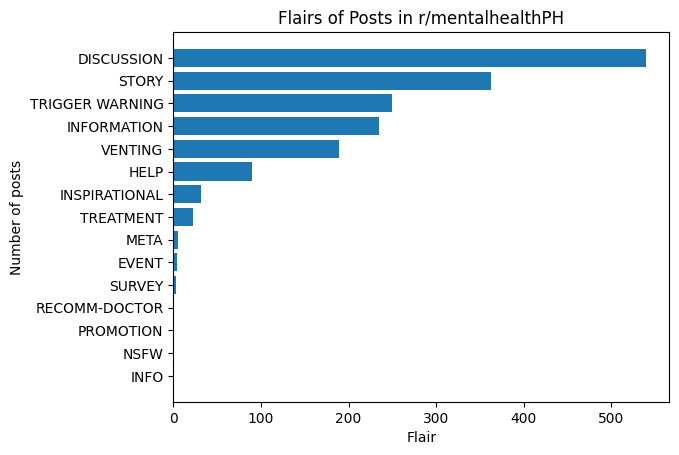

In [40]:
plt.barh(df_flairs['flair'], df_flairs['count'])

plt.xlabel('Flair')
plt.ylabel('Number of posts')
plt.title('Flairs of Posts in r/mentalhealthPH')

#fig.save('plots/flairs_bar.png', transparent=True)

plt.show()

## LDA - Top Flairs

### Discussion

In [41]:
dictionary_new = corpora.Dictionary(clean_df[clean_df['flair'] == 'DISCUSSION']['text'])
corpus_to_bow_new= [dictionary_new.doc2bow(document) for document in clean_df['text'].values]

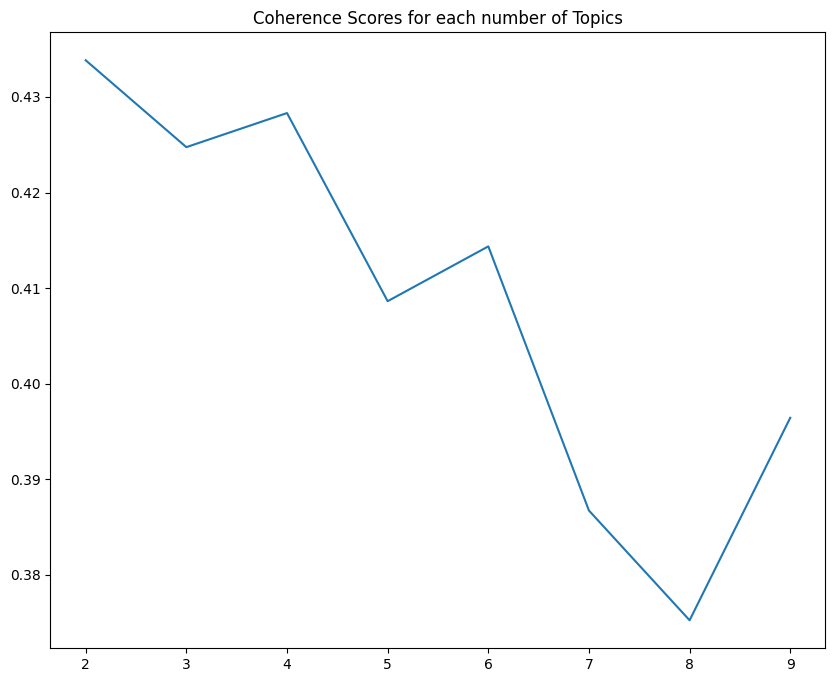

In [42]:
# Hypertuning
scores = []

for num_topics in range(2, 10):
    np.random.seed(random_seed)
    model = LdaModel(corpus_to_bow_new, num_topics, dictionary_new)
    coherence_score = CoherenceModel(model=model, texts=clean_df['text'], dictionary=dictionary_new).get_coherence()
    scores.append(coherence_score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), scores)
plt.title("Coherence Scores for each number of Topics")
plt.show()

In [43]:
num_topics_new = 4

In [44]:
model_new = LdaModel(corpus_to_bow_new, num_topics_new, dictionary_new)
model_new.print_topics()

coherence_model_new = CoherenceModel(model=model_new, texts=clean_df['text'], dictionary=dictionary_new)
print("Coherence Score: ", coherence_model_new.get_coherence())

vis_lda = gensimvis.prepare(model_new, corpus_to_bow_new, dictionary_new)
pyLDAvis.display(vis_lda)

Coherence Score:  0.4007133525727877


C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


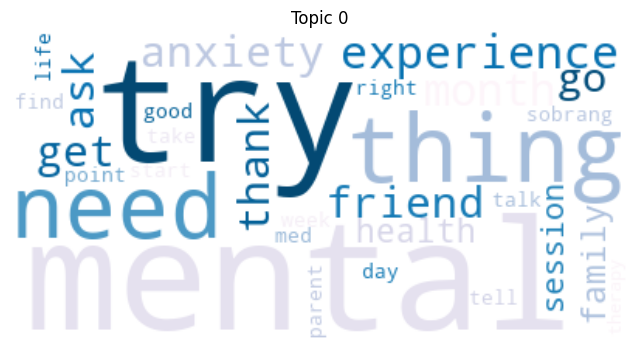

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


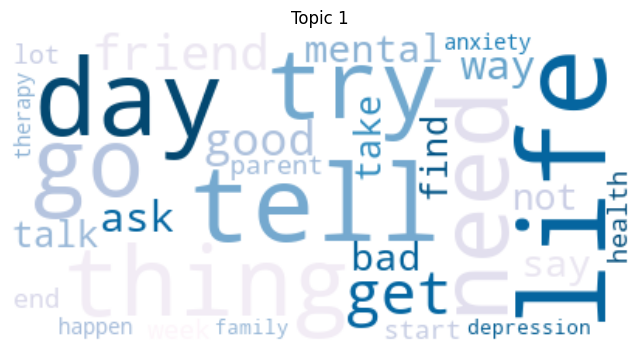

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


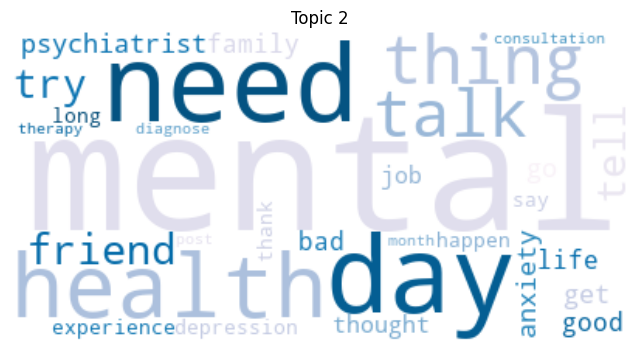

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


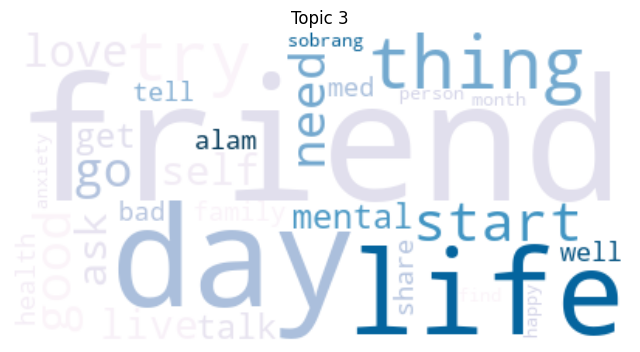

In [45]:
# Get the most probable words for each topic
topics_new = model_new.show_topics(num_topics=num_topics_new, num_words=30, formatted=False)

# Create a word cloud for each topic
for topic_id, topic_words in topics_new:
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}') #remove later
    plt.axis('off')

    # Show the plot
    plt.show()

### Story

In [46]:
dictionary_new = corpora.Dictionary(clean_df[clean_df['flair'] == 'STORY']['text'])
corpus_to_bow_new= [dictionary_new.doc2bow(document) for document in clean_df['text'].values]

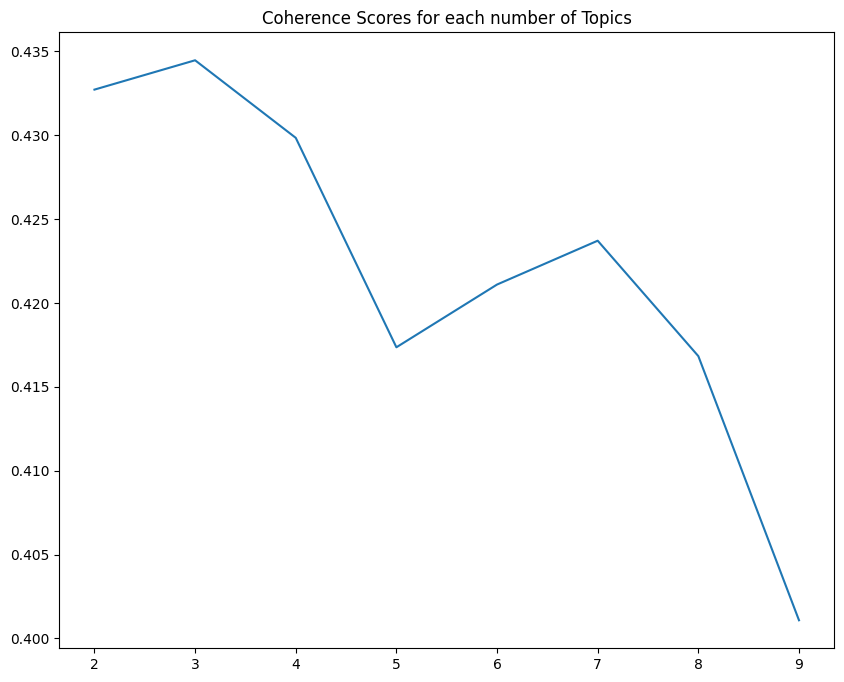

In [47]:
# Hypertuning
scores = []

for num_topics in range(2, 10):
    np.random.seed(random_seed)
    model = LdaModel(corpus_to_bow_new, num_topics, dictionary_new)
    coherence_score = CoherenceModel(model=model, texts=clean_df['text'], dictionary=dictionary_new).get_coherence()
    scores.append(coherence_score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), scores)
plt.title("Coherence Scores for each number of Topics")
plt.show()

In [48]:
num_topics_new = 3

In [49]:
model_new = LdaModel(corpus_to_bow_new, num_topics_new, dictionary_new)
model_new.print_topics()

coherence_model_new = CoherenceModel(model=model_new, texts=clean_df['text'], dictionary=dictionary_new)
print("Coherence Score: ", coherence_model_new.get_coherence())

vis_lda = gensimvis.prepare(model_new, corpus_to_bow_new, dictionary_new)
pyLDAvis.display(vis_lda)

Coherence Score:  0.434133866012906


C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


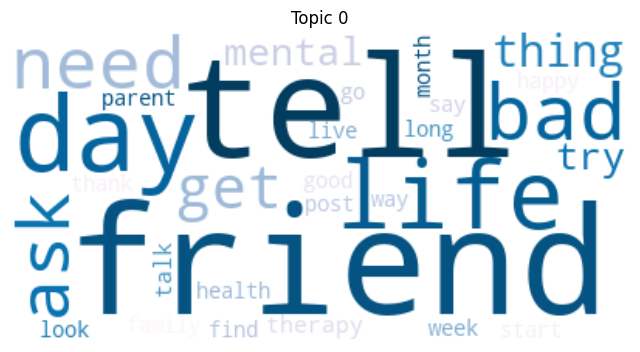

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


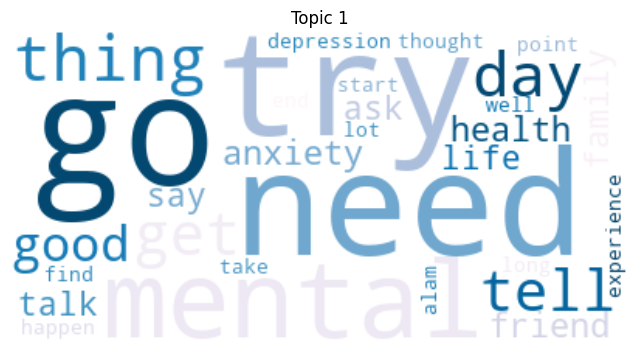

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


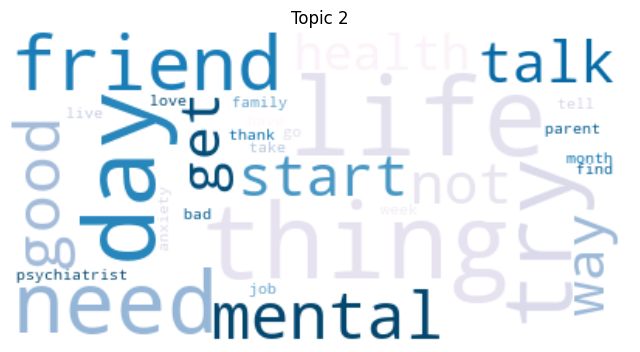

In [50]:
# Get the most probable words for each topic
topics_new = model_new.show_topics(num_topics=num_topics_new, num_words=30, formatted=False)

# Create a word cloud for each topic
for topic_id, topic_words in topics_new:
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}') #remove later
    plt.axis('off')

    # Show the plot
    plt.show()

### Trigger Warning

In [51]:
dictionary_new = corpora.Dictionary(clean_df[clean_df['flair'] == 'TRIGGER WARNING']['text'])
corpus_to_bow_new= [dictionary_new.doc2bow(document) for document in clean_df['text'].values]

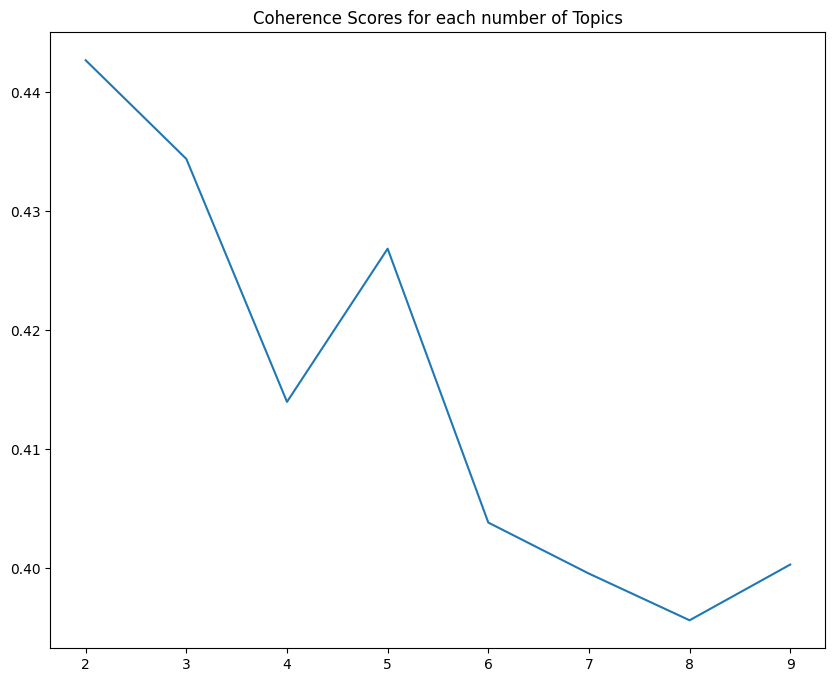

In [52]:
# Hypertuning
scores = []

for num_topics in range(2, 10):
    np.random.seed(random_seed)
    model = LdaModel(corpus_to_bow_new, num_topics, dictionary_new)
    coherence_score = CoherenceModel(model=model, texts=clean_df['text'], dictionary=dictionary_new).get_coherence()
    scores.append(coherence_score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), scores)
plt.title("Coherence Scores for each number of Topics")
plt.show()

In [53]:
num_topics_new = 3

In [54]:
model_new = LdaModel(corpus_to_bow_new, num_topics_new, dictionary_new)
model_new.print_topics()

coherence_model_new = CoherenceModel(model=model_new, texts=clean_df['text'], dictionary=dictionary_new)
print("Coherence Score: ", coherence_model_new.get_coherence())

vis_lda = gensimvis.prepare(model_new, corpus_to_bow_new, dictionary_new)
pyLDAvis.display(vis_lda)

Coherence Score:  0.4026973982691913


C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


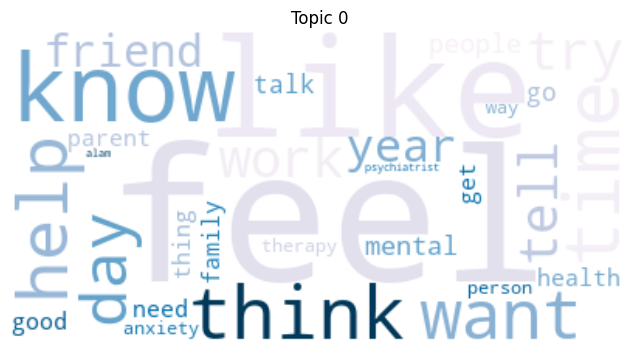

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


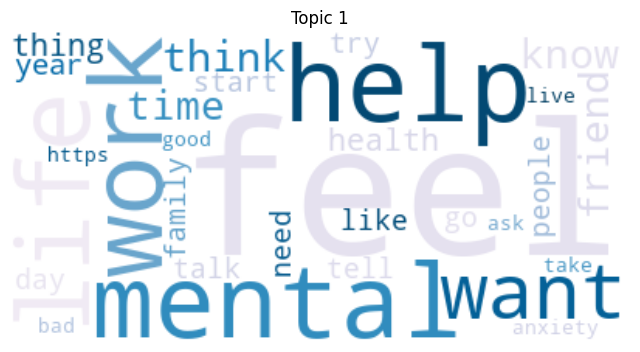

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


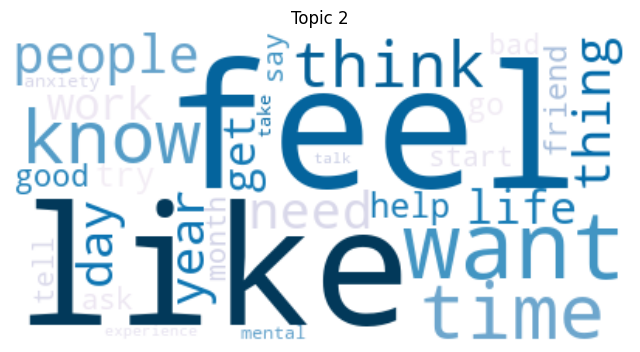

In [ ]:
# Get the most probable words for each topic
topics_new = model_new.show_topics(num_topics=num_topics_new, num_words=30, formatted=False)

# Create a word cloud for each topic
for topic_id, topic_words in topics_new:
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}') #remove later
    plt.axis('off')

    # Show the plot
    plt.show()

### Information

In [55]:
dictionary_new = corpora.Dictionary(clean_df[clean_df['flair'] == 'INFORMATION']['text'])
corpus_to_bow_new= [dictionary_new.doc2bow(document) for document in clean_df['text'].values]

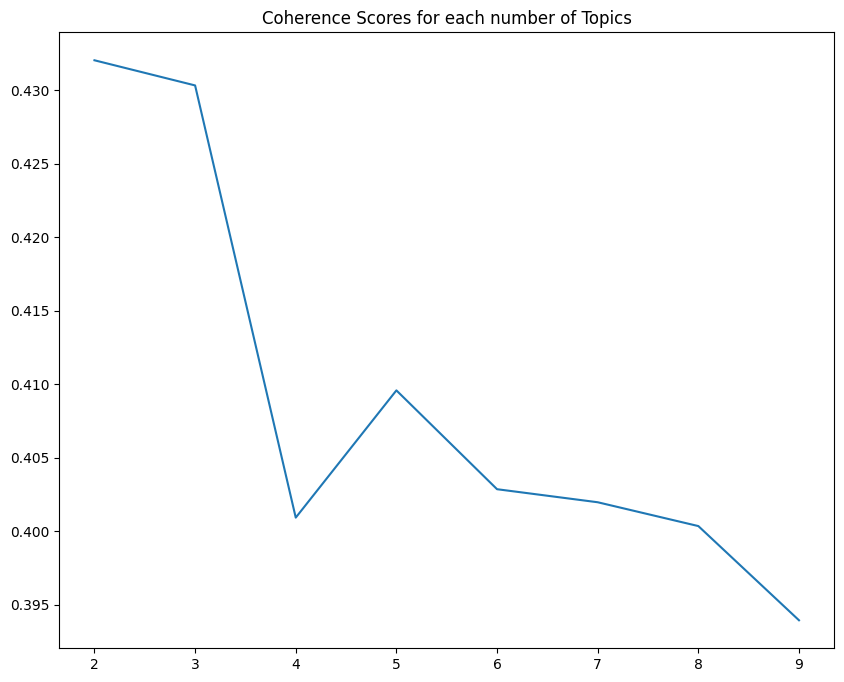

In [56]:
# Hypertuning
scores = []

for num_topics in range(2, 10):
    np.random.seed(random_seed)
    model = LdaModel(corpus_to_bow_new, num_topics, dictionary_new)
    coherence_score = CoherenceModel(model=model, texts=clean_df['text'], dictionary=dictionary_new).get_coherence()
    scores.append(coherence_score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), scores)
plt.title("Coherence Scores for each number of Topics")
plt.show()

In [57]:
num_topics_new = 3

In [58]:
model_new = LdaModel(corpus_to_bow_new, num_topics_new, dictionary_new)
model_new.print_topics()

coherence_model_new = CoherenceModel(model=model_new, texts=clean_df['text'], dictionary=dictionary_new)
print("Coherence Score: ", coherence_model_new.get_coherence())

vis_lda = gensimvis.prepare(model_new, corpus_to_bow_new, dictionary_new)
pyLDAvis.display(vis_lda)

Coherence Score:  0.4021403690829175


C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


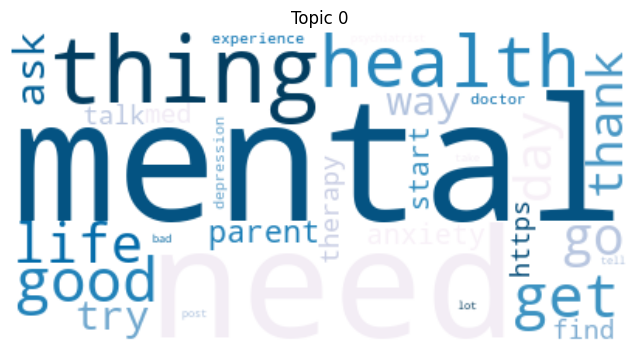

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


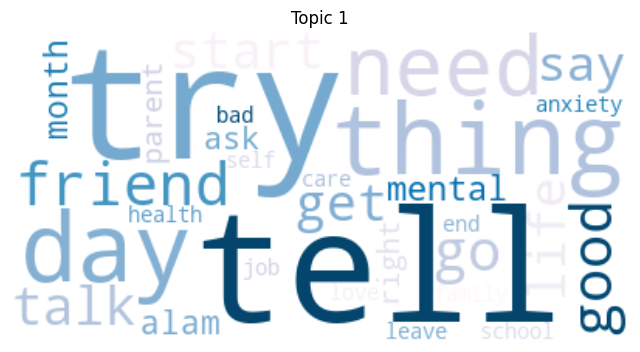

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


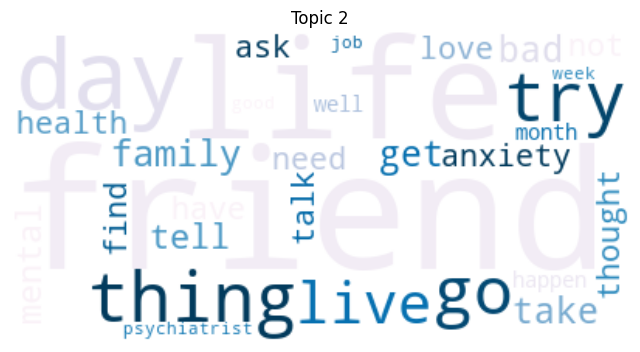

In [59]:
# Get the most probable words for each topic
topics_new = model_new.show_topics(num_topics=num_topics_new, num_words=30, formatted=False)

# Create a word cloud for each topic
for topic_id, topic_words in topics_new:
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}') #remove later
    plt.axis('off')

    # Show the plot
    plt.show()

### Venting

In [60]:
dictionary_new = corpora.Dictionary(clean_df[clean_df['flair'] == 'VENTING']['text'])
corpus_to_bow_new= [dictionary_new.doc2bow(document) for document in clean_df['text'].values]

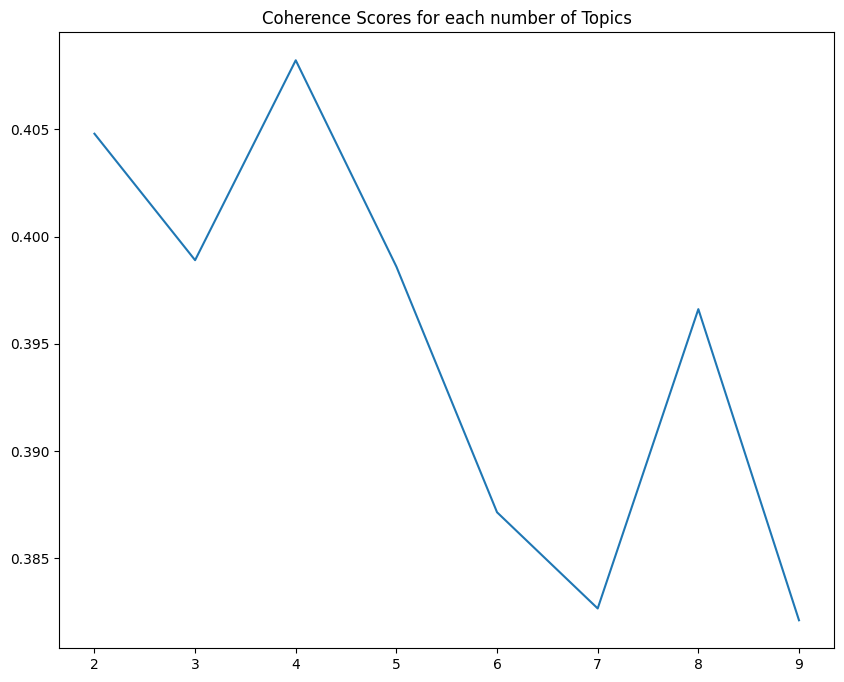

In [61]:
# Hypertuning
scores = []

for num_topics in range(2, 10):
    np.random.seed(random_seed)
    model = LdaModel(corpus_to_bow_new, num_topics, dictionary_new)
    coherence_score = CoherenceModel(model=model, texts=clean_df['text'], dictionary=dictionary_new).get_coherence()
    scores.append(coherence_score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), scores)
plt.title("Coherence Scores for each number of Topics")
plt.show()

In [62]:
num_topics_new = 4

In [63]:
model_new = LdaModel(corpus_to_bow_new, num_topics_new, dictionary_new)
model_new.print_topics()

coherence_model_new = CoherenceModel(model=model_new, texts=clean_df['text'], dictionary=dictionary_new)
print("Coherence Score: ", coherence_model_new.get_coherence())

vis_lda = gensimvis.prepare(model_new, corpus_to_bow_new, dictionary_new)
pyLDAvis.display(vis_lda)

Coherence Score:  0.43856394551785827


C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


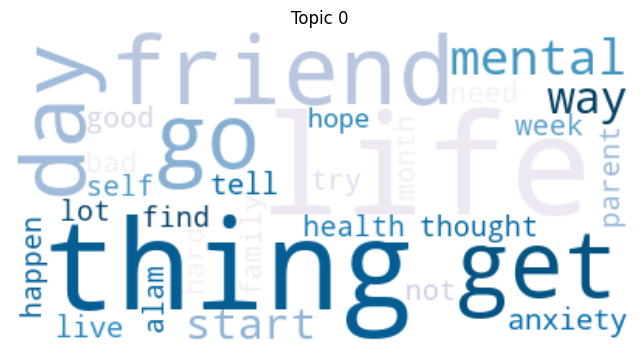

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


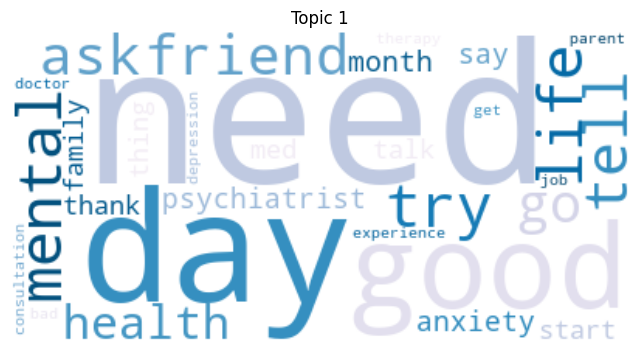

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


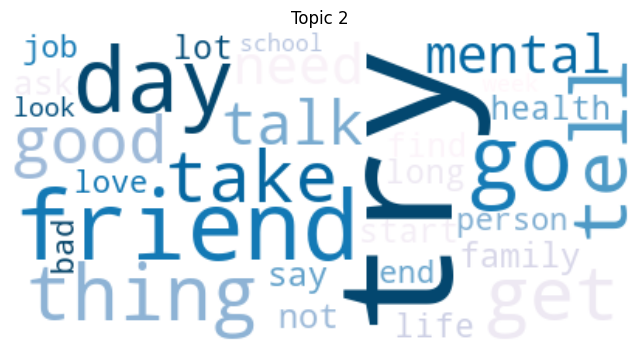

C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


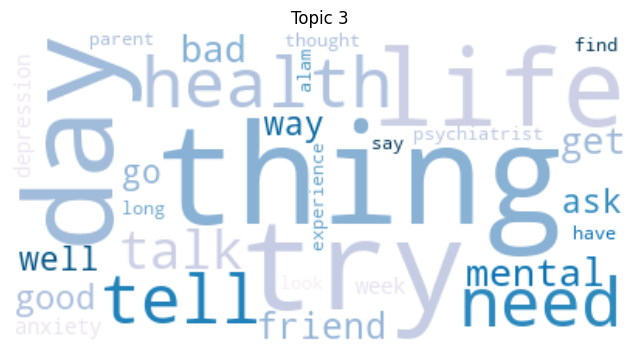

In [64]:
# Get the most probable words for each topic
topics_new = model_new.show_topics(num_topics=num_topics_new, num_words=30, formatted=False)

# Create a word cloud for each topic
for topic_id, topic_words in topics_new:
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}') #remove later
    plt.axis('off')

    # Show the plot
    plt.show()

# HDP - Selected Flairs

## Trigger Warning

In [36]:
dictionary_new = corpora.Dictionary(clean_df[clean_df['flair'] == 'TRIGGER WARNING']['text'])
corpus_to_bow_new= [dictionary_new.doc2bow(document) for document in clean_df['text'].values]

In [40]:
model_hdp = HdpModel(corpus_to_bow_new, dictionary_new, T=5)
model_hdp.print_topics()

[(0,
  '0.002*go + 0.002*month + 0.002*life + 0.002*father + 0.001*mental + 0.001*way + 0.001*get + 0.001*thing + 0.001*day + 0.001*top'),
 (1,
  '0.002*overburden + 0.002*nmat + 0.001*oc + 0.001*bitch + 0.001*diagnose + 0.001*science + 0.001*stufd + 0.001*affectionate + 0.001*paluin + 0.001*psych'),
 (2,
  '0.002*insanely + 0.001*hinder + 0.001*secret + 0.001*peacefully + 0.001*lash + 0.001*face + 0.001*compulsive + 0.001*accept + 0.001*pinanganak + 0.001*neglectful'),
 (3,
  '0.002*ease + 0.002*accomplish + 0.002*juskoooo + 0.001*tumataba + 0.001*clingy + 0.001*plm + 0.001*tire + 0.001*threaten + 0.001*organize + 0.001*round'),
 (4,
  '0.002*naked + 0.002*dressed + 0.002*assistance + 0.001*specialize + 0.001*makasasama + 0.001*nasearch + 0.001*apartment + 0.001*dangerous + 0.001*balikan + 0.001*ikakalat')]

In [44]:
coherence_model_hdp = CoherenceModel(model=model_hdp, texts=clean_df['text'], dictionary=dictionary_new)
print("Coherence Score: ", coherence_model_hdp.get_coherence())

Coherence Score:  0.6606531982463008


C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` 

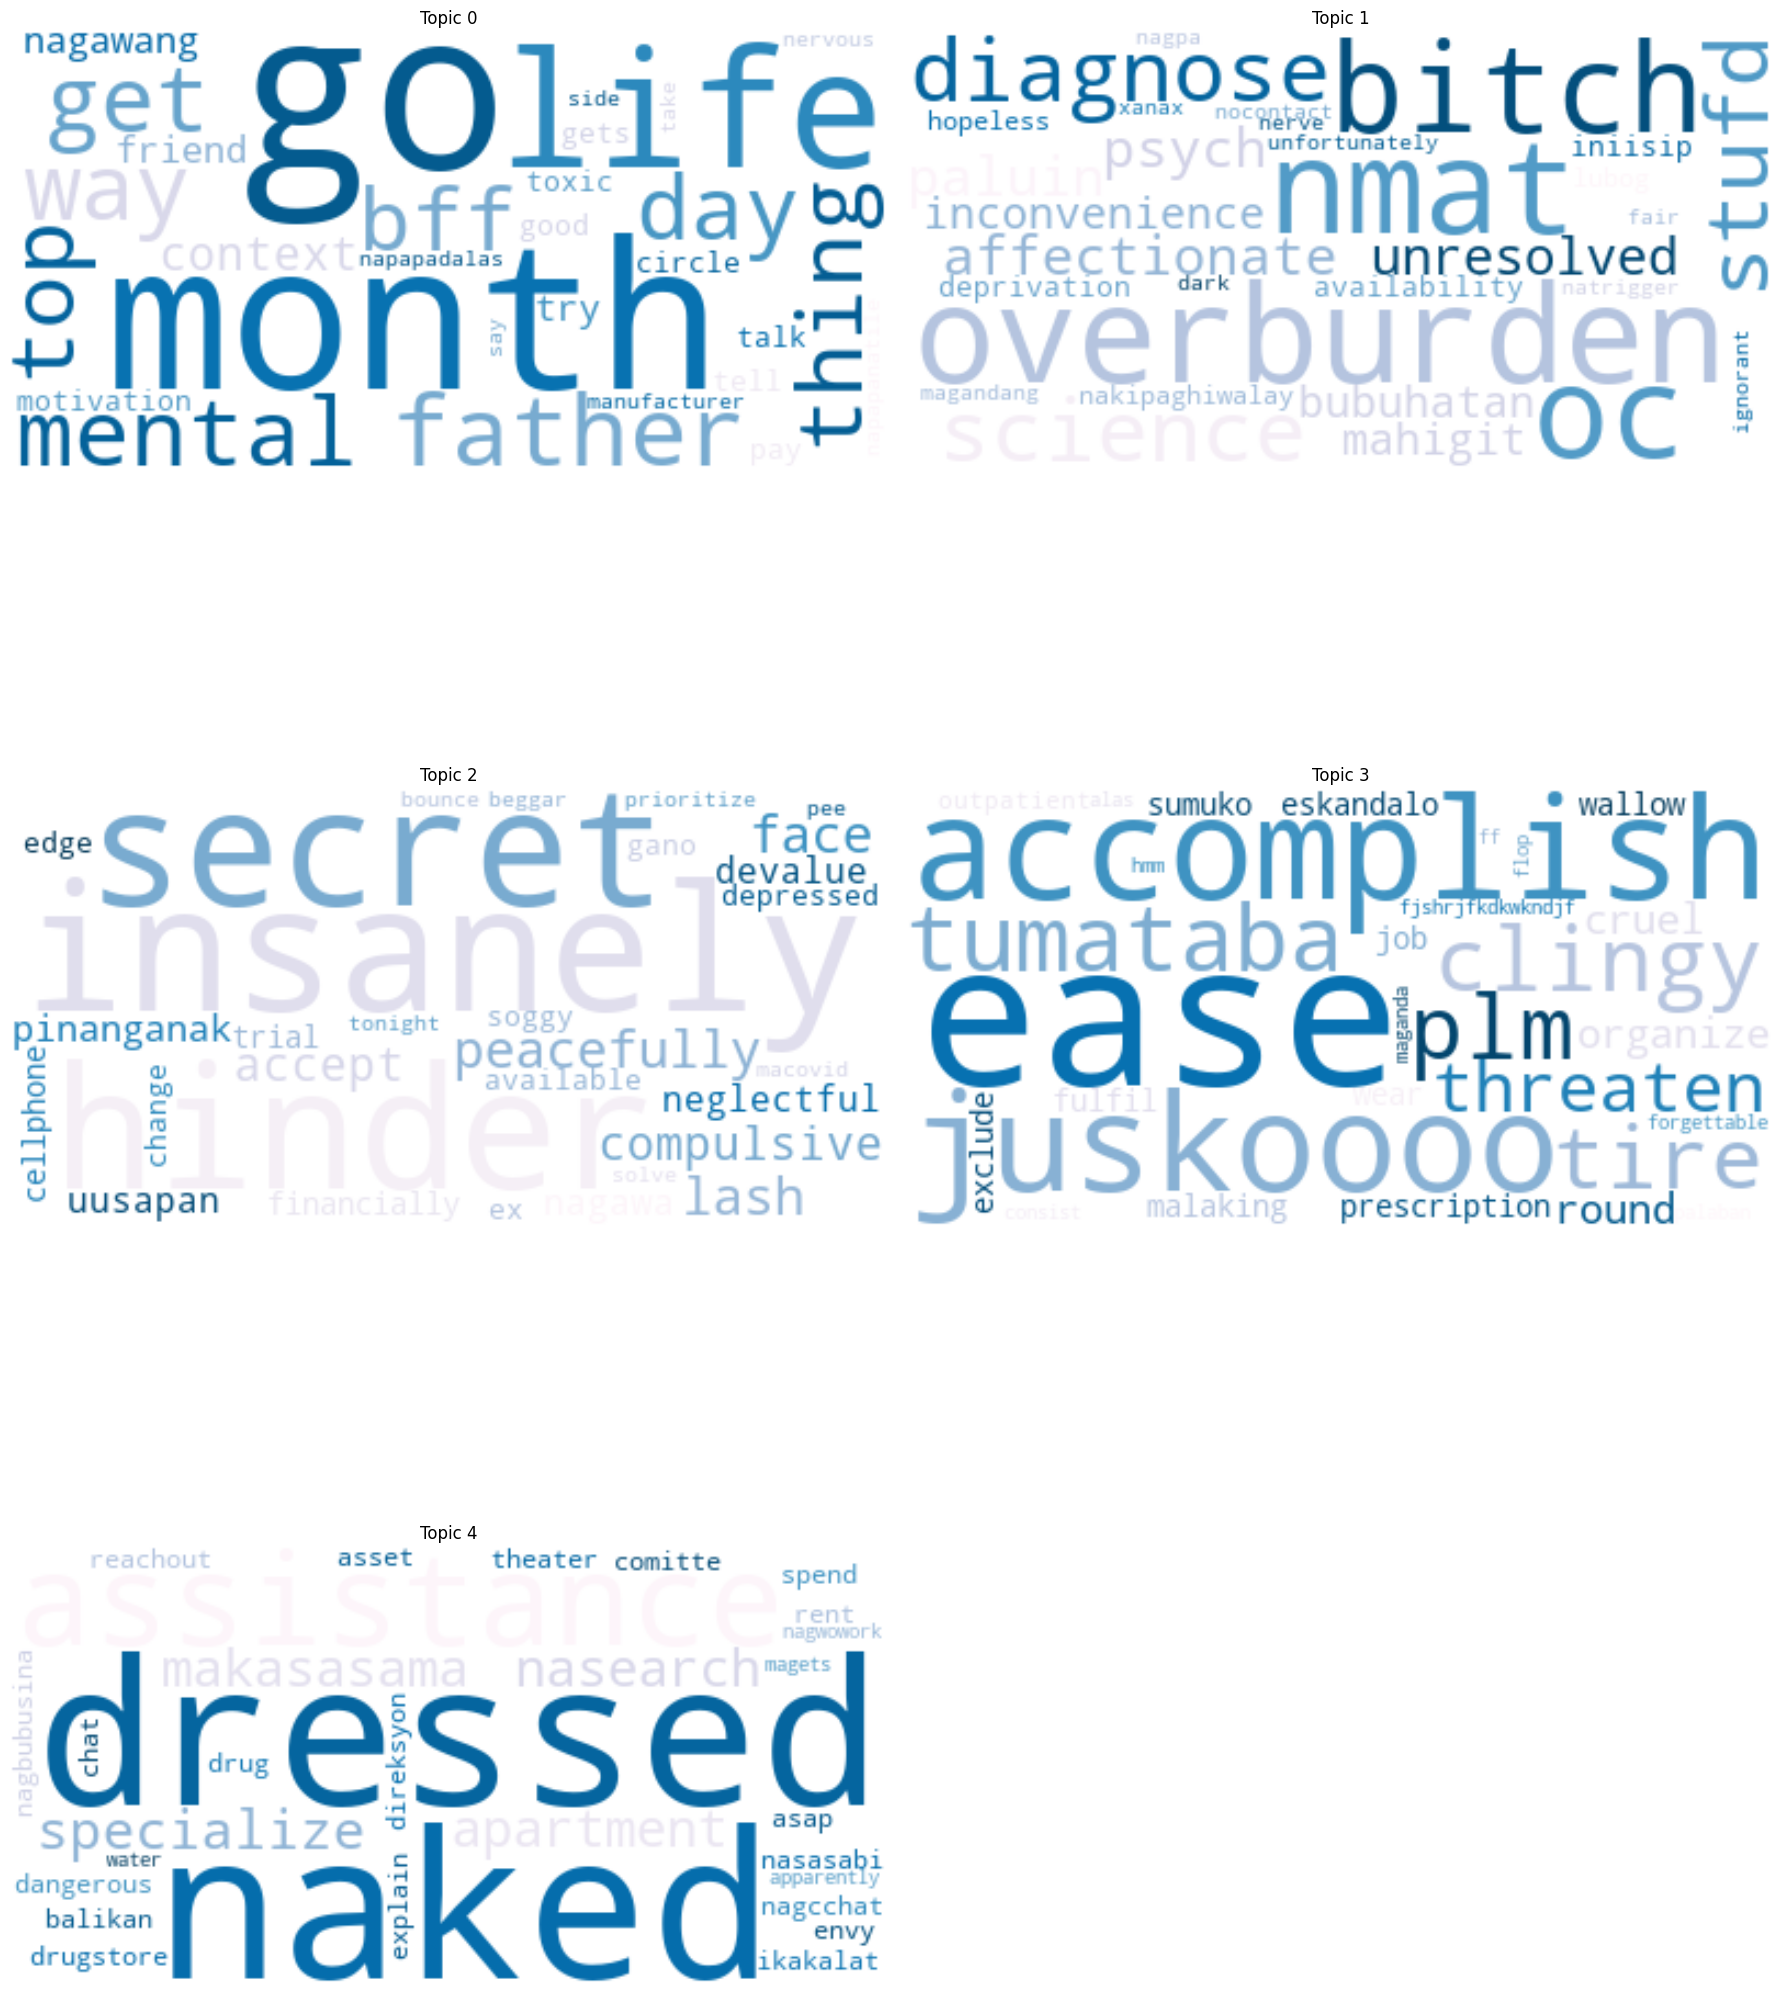

In [45]:
# Get the most probable words for each topic
topics = model_hdp.show_topics(num_topics=20, num_words=30, formatted=False)

# Set the number of columns and rows for the subplots
num_columns = 2
num_rows = (len(topics) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 24))

# Flatten the axes array
axes = axes.flatten()

# Create a word cloud for each topic
for i, (topic_id, topic_words) in enumerate(topics):
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Topic {topic_id}')
    axes[i].axis('off')

# Remove any empty subplots
if len(topics) < num_columns * num_rows:
    for j in range(len(topics), num_columns * num_rows):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Information

In [46]:
dictionary_new = corpora.Dictionary(clean_df[clean_df['flair'] == 'INFORMATION']['text'])
corpus_to_bow_new= [dictionary_new.doc2bow(document) for document in clean_df['text'].values]

In [47]:
model_hdp = HdpModel(corpus_to_bow_new, dictionary_new, T=5)
model_hdp.print_topics()

[(0,
  '0.003*jnpln + 0.003*recent + 0.002*clinically + 0.002*love + 0.002*suggest + 0.002*kagabi + 0.002*depress + 0.002*hello + 0.002*daw + 0.002*glass'),
 (1,
  '0.003*mindcare + 0.002*counsel + 0.002*counseling + 0.002*nagawa + 0.002*awkwardness + 0.002*hard + 0.002*opportunity + 0.002*cubicle + 0.002*luke + 0.002*exciting'),
 (2,
  '0.003*eui + 0.003*zolodin + 0.002*man + 0.002*plenty + 0.002*exercise + 0.002*tho + 0.002*gr + 0.002*kagabi + 0.002*concentration + 0.002*assess'),
 (3,
  '0.003*pagkakaiba + 0.002*mobile + 0.002*metropsych + 0.002*mawean + 0.002*depression + 0.002*attention + 0.002*chanhe + 0.002*kank + 0.002*kinatatawanan + 0.002*light'),
 (4,
  '0.003*enjoy + 0.003*require + 0.003*thinking + 0.003*soon + 0.003*makakuha + 0.002*dark + 0.002*facebook + 0.002*use + 0.002*nakakapagod + 0.002*calendar')]

In [48]:
coherence_model_hdp = CoherenceModel(model=model_hdp, texts=clean_df['text'], dictionary=dictionary_new)
print("Coherence Score: ", coherence_model_hdp.get_coherence())

Coherence Score:  0.6822514645856288


C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` 

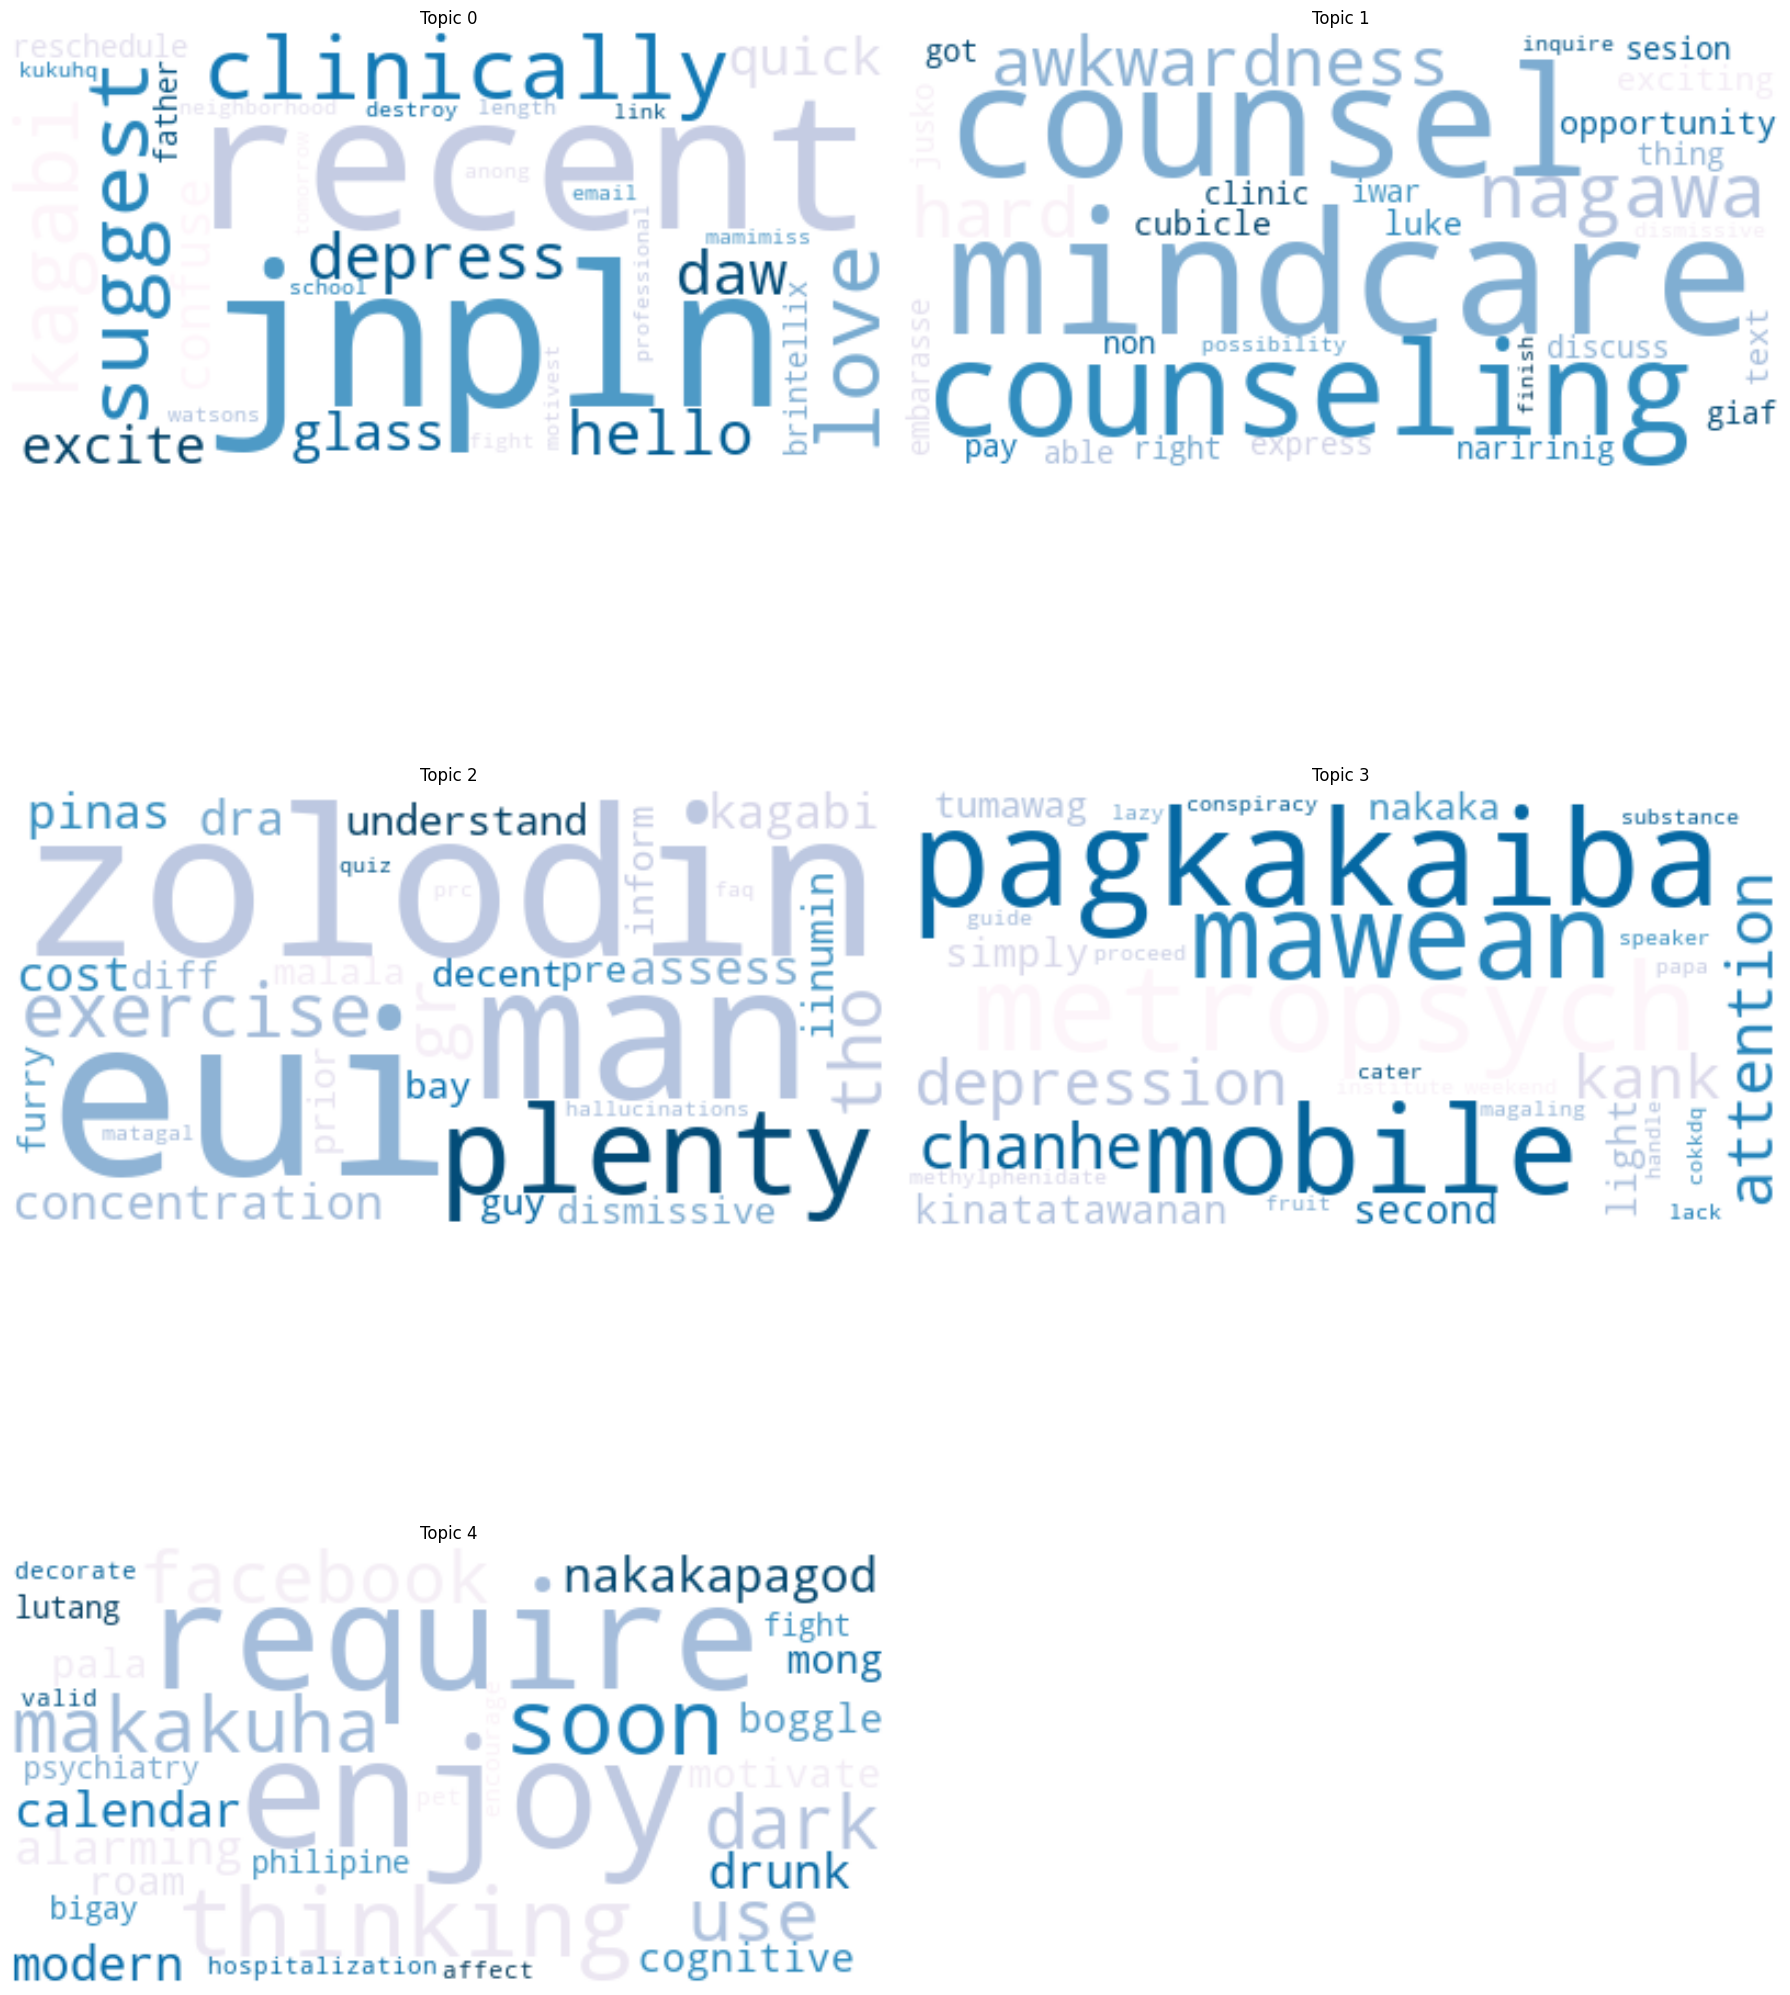

In [49]:
# Get the most probable words for each topic
topics = model_hdp.show_topics(num_topics=20, num_words=30, formatted=False)

# Set the number of columns and rows for the subplots
num_columns = 2
num_rows = (len(topics) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 24))

# Flatten the axes array
axes = axes.flatten()

# Create a word cloud for each topic
for i, (topic_id, topic_words) in enumerate(topics):
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Topic {topic_id}')
    axes[i].axis('off')

# Remove any empty subplots
if len(topics) < num_columns * num_rows:
    for j in range(len(topics), num_columns * num_rows):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Venting

In [50]:
dictionary_new = corpora.Dictionary(clean_df[clean_df['flair'] == 'VENTING']['text'])
corpus_to_bow_new= [dictionary_new.doc2bow(document) for document in clean_df['text'].values]

In [51]:
model_hdp = HdpModel(corpus_to_bow_new, dictionary_new, T=5)
model_hdp.print_topics()

[(0,
  '0.002*fine + 0.002*advise + 0.002*get + 0.002*initin + 0.002*nakaya + 0.002*anak + 0.002*result + 0.002*blablabla + 0.002*pamilyang + 0.001*magmall'),
 (1,
  '0.002*kame + 0.002*akap + 0.001*honor + 0.001*remember + 0.001*naguguluhan + 0.001*validation + 0.001*frustration + 0.001*hanap + 0.001*biglang + 0.001*slowly'),
 (2,
  '0.002*countryman + 0.002*pangatlo + 0.002*andami + 0.002*mangamusta + 0.002*grapple + 0.002*serving + 0.002*current + 0.002*wokes + 0.001*feb + 0.001*odd'),
 (3,
  '0.002*obligasyon + 0.002*depth + 0.002*mamotivate + 0.002*everytime + 0.002*friends + 0.002*handle + 0.001*day + 0.001*batchmate + 0.001*lost + 0.001*sns'),
 (4,
  '0.002*nagawang + 0.002*change + 0.002*reflux + 0.001*reservoir + 0.001*bahay + 0.001*numb + 0.001*pill + 0.001*thinking + 0.001*thread + 0.001*backup')]

In [52]:
coherence_model_hdp = CoherenceModel(model=model_hdp, texts=clean_df['text'], dictionary=dictionary_new)
print("Coherence Score: ", coherence_model_hdp.get_coherence())

Coherence Score:  0.6890198192980103


C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\XIAOMI\Documents\EskwelabsDSF11\Capstone\venvcap\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` 

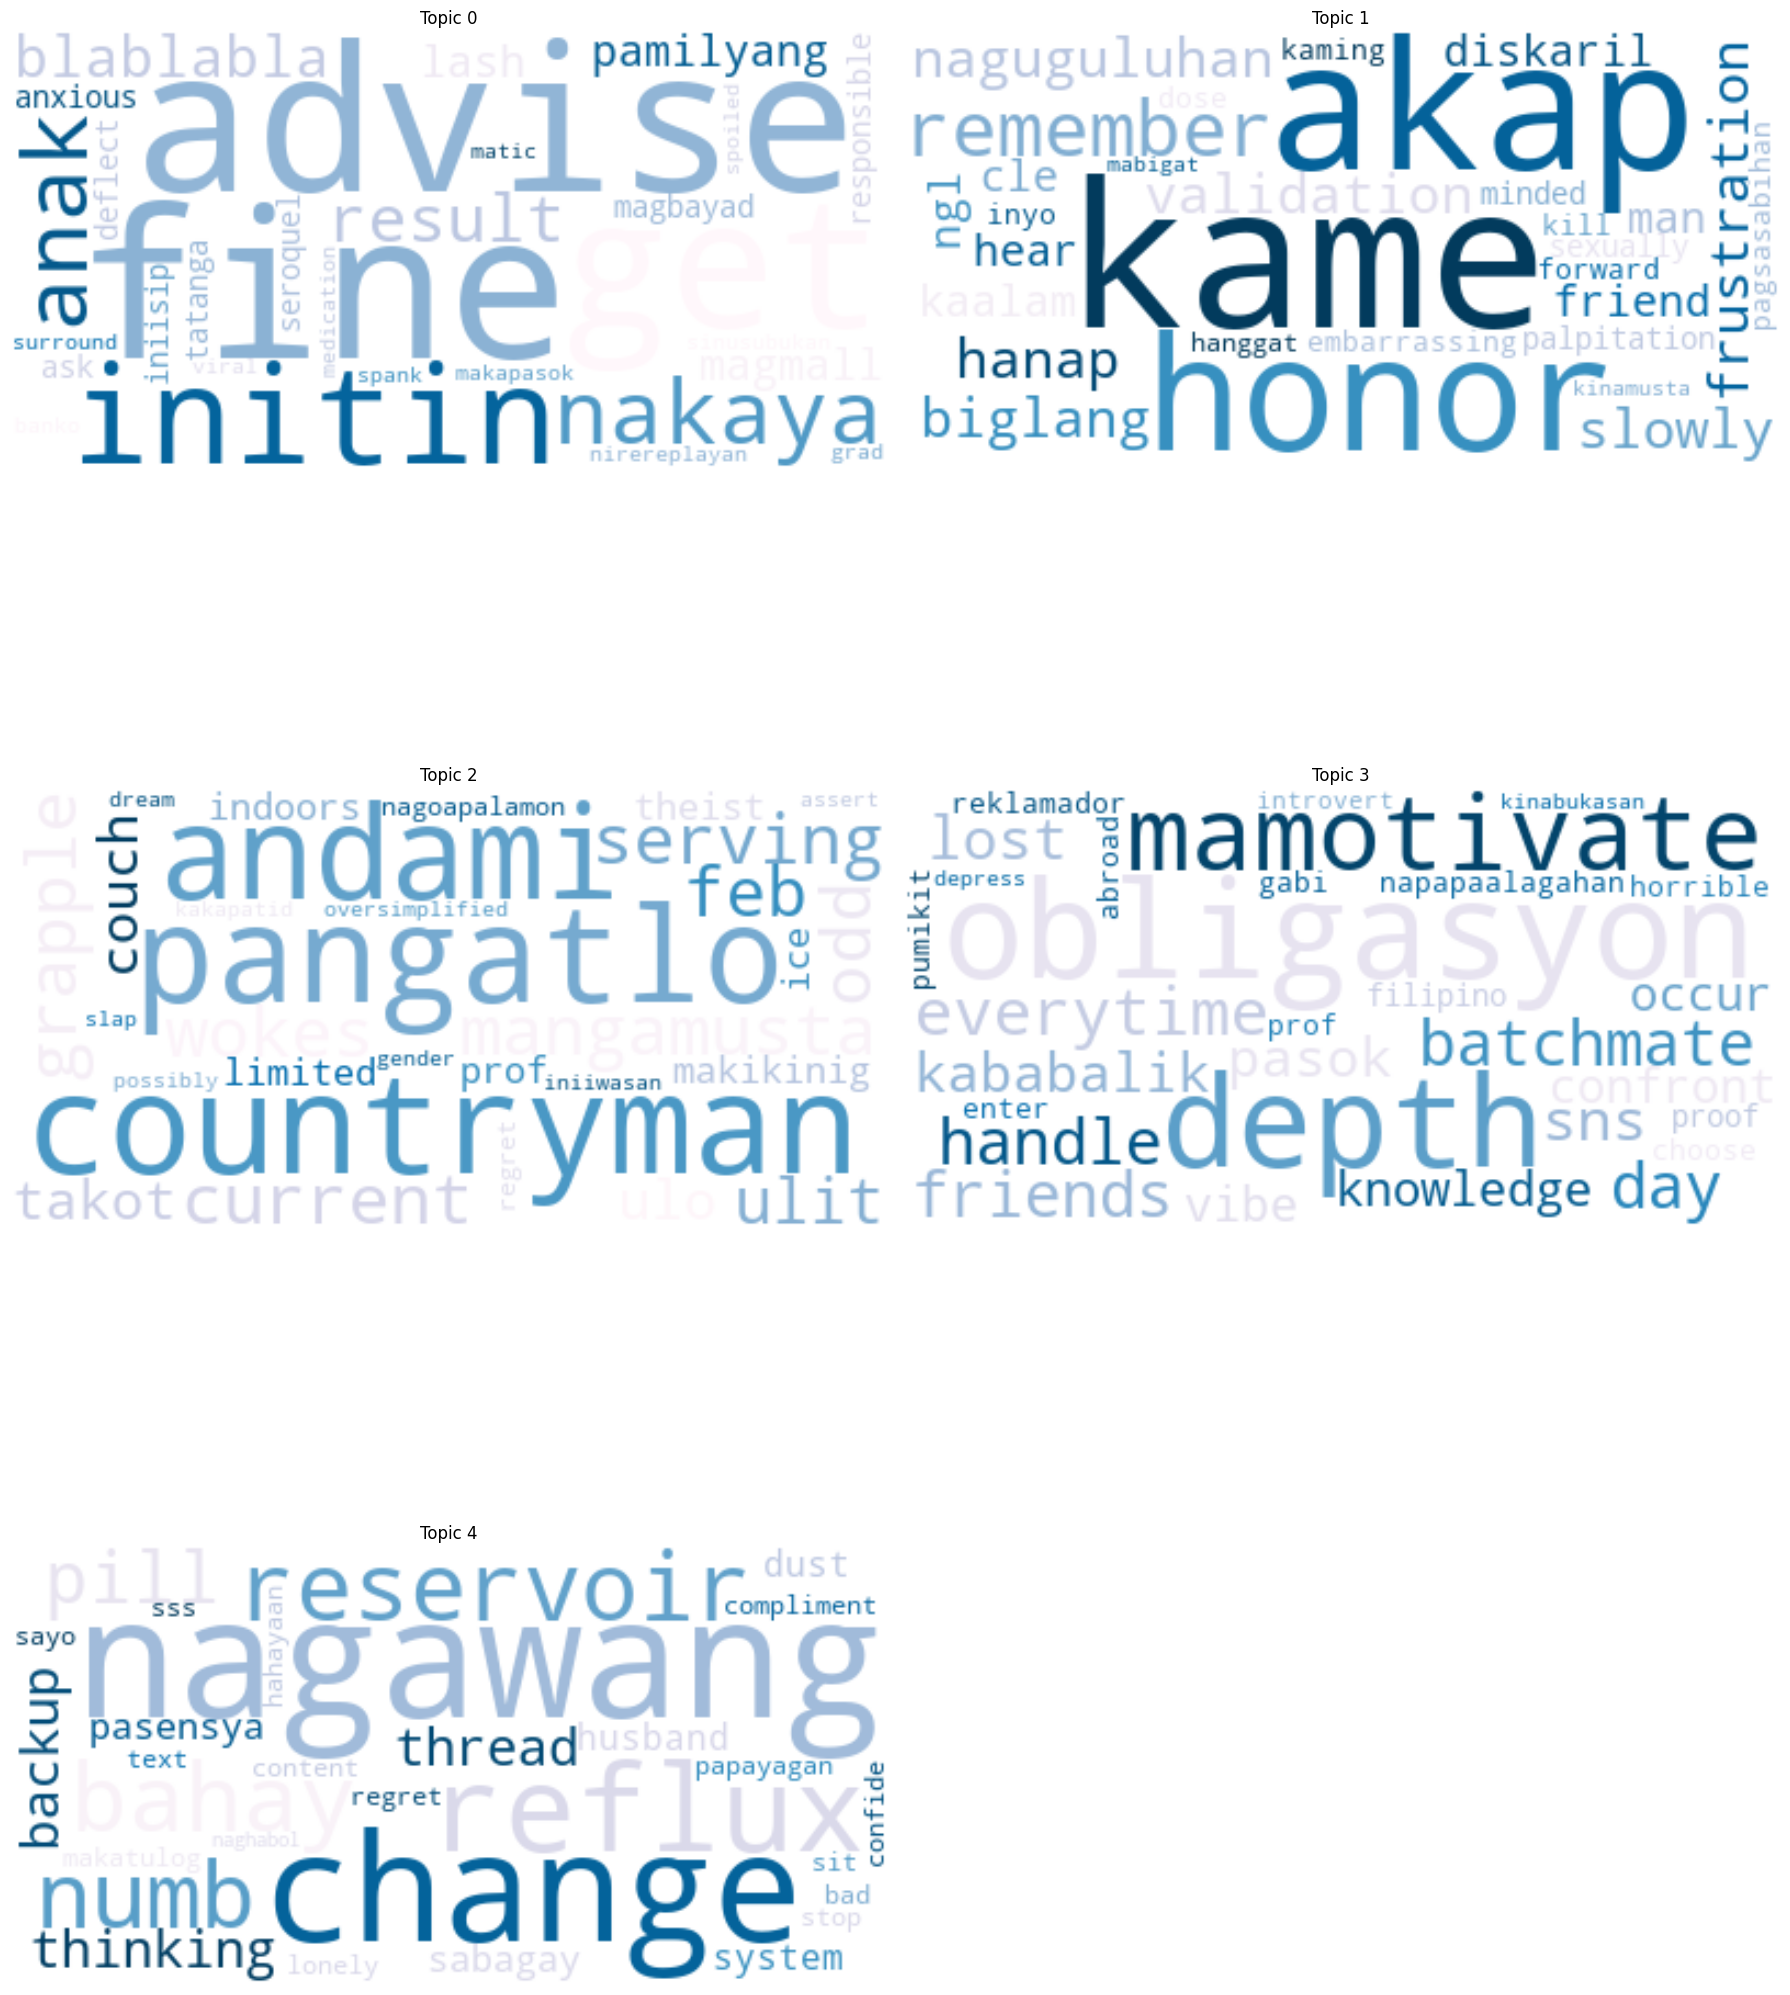

In [53]:
# Get the most probable words for each topic
topics = model_hdp.show_topics(num_topics=20, num_words=30, formatted=False)

# Set the number of columns and rows for the subplots
num_columns = 2
num_rows = (len(topics) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 24))

# Flatten the axes array
axes = axes.flatten()

# Create a word cloud for each topic
for i, (topic_id, topic_words) in enumerate(topics):
    # Create a word cloud object
    wordcloud = WordCloud(background_color='white', colormap='PuBu')

    # Generate the word cloud from the topic words
    wordcloud.generate_from_frequencies(dict(topic_words))

    # Plot the word cloud on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Topic {topic_id}')
    axes[i].axis('off')

# Remove any empty subplots
if len(topics) < num_columns * num_rows:
    for j in range(len(topics), num_columns * num_rows):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
